# Modelo autorregresivo AR\(p\)
### Hipótesis
El valor actual de la serie puede explicarse como una combinación lineal de sus $p$ valores pasados, más un error aleatorio.

$X_t = c + \displaystyle\sum_{i=1}^{p} \phi_i X_{t-i} + \epsilon_t$

Donde:

- $( X_t )$ es el valor de la serie en el tiempo $( t )$
- $( c )$ es una constante
- $( \phi_i )$ son los coeficientes autorregresivos
- $( \epsilon_t )$ es el error aleatorio (ruido blanco)


Usamos el backshift operator $B$  que aplica un desfase de una unidad en el tiempo: $B^kX_t = X_{t-k} ​$

$X_t = c + \displaystyle\sum_{i=1}^{p} \phi_i B^i X_t + \epsilon_t$

Esto nos permite reescribir nuestra ecuación en notación polinómica:

$\phi(B)X_t= c + \epsilon_t$ 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import MetaTrader5 as mt5
from datetime import datetime


In [3]:
# Configuramos MT5
# Este último debe de estar abierto para que funcione (me ha costado 3h entenderlo)

import os
from dotenv import load_dotenv

load_dotenv()

MT5_LOGIN = os.getenv('MT5_LOGIN')
MT5_PWD = os.getenv('MT5_PWD')

mt5.initialize()

mt5.login(int(MT5_LOGIN), MT5_PWD,'MetaQuotes-Demo')

True

In [34]:
from_date = datetime(2015, 1, 1)
to_date = datetime.now()

rates = mt5.copy_rates_range("US500", mt5.TIMEFRAME_M1, from_date, to_date)

data = pd.DataFrame(rates)
data = data.drop('real_volume', axis=1)
data['time'] = pd.to_datetime(data['time'], unit='s')
data["log_returns"] = np.log(data['close']/data['close'].shift(1))
data.dropna(inplace=True)
data.set_index('time', inplace=True)

data

,open,high,low,close,tick_volume,spread,log_returns
time,,,,,,,
2015-01-05 00:00:00,2053.10,2054.00,2016.00,2024.50,11893,0,-0.013979
2015-01-06 00:00:00,2024.70,2030.20,1991.50,2001.70,14371,0,-0.011326
2015-01-07 00:00:00,2001.10,2030.00,2000.90,2027.00,11994,0,0.012560
2015-01-08 00:00:00,2027.20,2064.80,2026.70,2059.80,9008,0,0.016052
2015-01-09 00:00:00,2060.30,2068.30,2037.70,2041.20,11503,0,-0.009071
...,...,...,...,...,...,...,...
2025-05-02 22:55:00,5687.15,5687.35,5681.10,5682.65,370,40,-0.000888
2025-05-02 22:56:00,5682.60,5684.50,5682.25,5683.80,317,40,0.000202
2025-05-02 22:57:00,5683.75,5686.70,5683.75,5686.35,355,40,0.000449


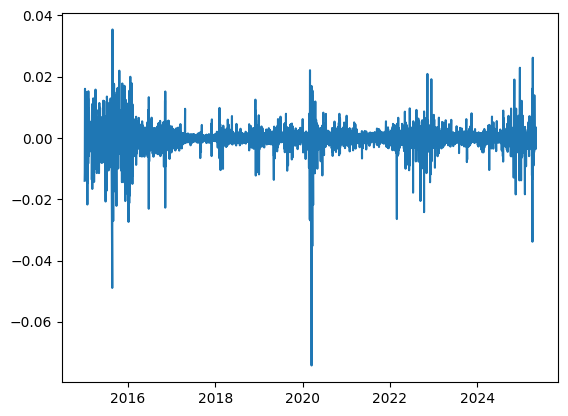

In [35]:
"""from statsmodels.tsa.stattools import adfuller

result = adfuller(data['log_returns'])

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}, {value}')"""

# Después de 20 min runneando el test seguimos sin resultados.
# Vamos a suponer que el dataset es estacional por razones prácticas.

plt.plot(data['log_returns'])


In [36]:
train_size = 0.7

# Separamos el dataset para hacer backtesting
# Habria en el futuro de concretar un pipeline con cross-validation

train_data = data.copy().iloc[:int(len(data) * train_size)]
test_data  = data.copy().iloc[int(len(data) * train_size):]

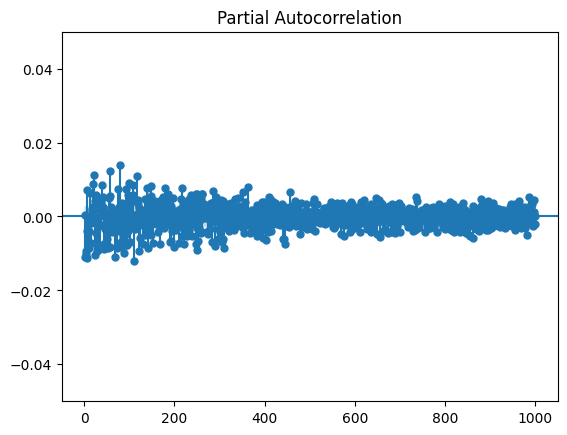

In [39]:
from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots()

plot_pacf(train_data['log_returns'], ax=ax, method='ywm',
           lags=100, alpha=0.0001, use_vlines=True, zero=False)

ax.set_ylim(-0.05, 0.05)

plt.show()